In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
from scipy.stats import rv_discrete ,beta
import numpy as np

import networkx as nx
from networkx.generators.community import LFR_benchmark_graph as LFR

import threading
import _thread
from datetime import datetime

# Хи-квадрат

In [29]:
control = [4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 35, 35, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 42, 42, 43, 43, 44, 44, 44, 44, 45, 46, 46, 47, 47, 47, 47, 47, 48, 49, 51, 52, 52, 52, 54, 55, 55, 55, 58, 58, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 68, 69, 71, 72, 73, 73, 74, 75, 76, 84, 85, 89, 94, 97, 101, 102, 104, 109, 109]
test = [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 43, 43, 43, 44, 45, 45, 45, 46, 46, 47, 49, 49, 49, 50, 50, 50, 51, 51, 51, 51, 51, 52, 53, 53, 54, 54, 55, 55, 55, 55, 55, 56, 56, 57, 58, 58, 59, 61, 61, 62, 64, 64, 64, 67, 67, 67, 68, 70, 74, 92]


test = [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 37, 37, 37, 38, 38, 38, 38, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 43, 44, 45, 45, 45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 49, 49, 51, 52, 52, 52, 52, 53, 57, 57, 58, 61, 61, 62, 62, 63, 63, 64, 65, 69, 69, 71, 73, 74, 79, 80]


In [21]:
# Init dataframe
df_bins = pd.DataFrame()

# Generate bins from control group
_, bins = pd.qcut(control, q=10, retbins=True)
df_bins['bin'] = pd.cut(control, bins=bins).value_counts().index

# Apply bins to both groups
df_bins['income_c_observed'] = pd.cut(control, bins=bins).value_counts().values
df_bins['income_t_observed'] = pd.cut(test, bins=bins).value_counts().values

# Compute expected frequency in the treatment group
df_bins['income_t_expected'] = df_bins['income_c_observed'] / np.sum(df_bins['income_c_observed']) * np.sum(df_bins['income_t_observed'])

df_bins

,bin,income_c_observed,income_t_observed,income_t_expected
0,"(4.0, 7.0]",108,66,104.185671
1,"(7.0, 13.0]",126,206,121.549950
2,"(13.0, 14.0]",80,31,77.174571
3,"(14.0, 16.0]",137,87,132.161453
4,"(16.0, 17.0]",47,38,45.340061
5,"(17.0, 19.0]",105,101,101.291625
6,"(19.0, 21.0]",98,70,94.538850
7,"(21.0, 24.0]",113,101,109.009082
8,"(24.0, 30.1]",77,118,74.280525
9,"(30.1, 109.0]",100,138,96.468214


In [19]:
from scipy.stats import chisquare

stat, p_value = chisquare(df_bins['income_t_observed'], df_bins['income_t_expected'])
print(f"Chi-squared Test: statistic={stat:.4f}, p-value={p_value:.4f}")


Chi-squared Test: statistic=122.9714, p-value=0.0000


In [22]:
from scipy.stats import chisquare

stat, p_value = chisquare(df_bins['income_t_observed'], df_bins['income_t_expected'])
print(f"Chi-squared Test: statistic={stat:.4f}, p-value={p_value:.4f}")


Chi-squared Test: statistic=167.4881, p-value=0.0000


# Колмогорова - Смирнова

In [28]:
from scipy.stats import kstest

stat, p_value = kstest(control, test)
print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value:.4f}")


 Kolmogorov-Smirnov Test: statistic=0.1080, p-value=0.0000


In [30]:
from scipy.stats import kstest

stat, p_value = kstest(control, test)
print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value:.4f}")


 Kolmogorov-Smirnov Test: statistic=0.0620, p-value=0.0428


In [31]:
import random
random.choices([0,1,2,3,4,5], k=10)

[1, 1, 3, 2, 4, 3, 3, 4, 2, 2]

In [3]:
power=2
def xk(min_d,max_d):
    return range(min_d,max_d+1)
def pk(min_d,max_d):
    l=[]
    summ=su(min_d,max_d)
    for x in xk(min_d,max_d):
        ll=1/(pow(x,power)*summ)
        l.append(ll)
    return tuple(l)

def su(min_d,max_d):
    su=0
    for i in xk(min_d,max_d):
         su+=1/(pow(i,power))
    return su

In [4]:
N = 1000
etta = 0.05
ro = 0.7
d_manual = 0.75
betta = 0.1
min_d = 1
m = 500
RandPL = rv_discrete(min_d,m,values=(xk(min_d,m),pk(min_d,m)))
degrees = RandPL.rvs(size=N)

degrees=sorted(list(degrees))


### Критерий Колмогорова

### Строим эмпирическую функцию распределения

In [5]:
import collections
#перевод из выборки в распределение
def dist(degrees):
    d=dict(collections.Counter(degrees))
    distribution = []
    summm = sum(d.values())
    
    for i in range(1,m+1):
        if i in d:
            distribution.append(d[i]/summm)
        else:
            distribution.append(0)
    return distribution

In [6]:
def func_statistics(empir_dist,real_dist):
    stat=0
    for i,p in enumerate(empir_dist):
        stat+= pow((p-real_dist[i]),2)/real_dist[i]
    return stat*len(empir_dist)

In [7]:
Statistics = []
K = 1000 #число выборок 
N = 1000 #размер выборки 
real_dist = list(pk(min_d,m))
m = 500
min_d=1
dists_list=[]
for k in range(K):
    RandPL = rv_discrete(min_d,m,values=(xk(min_d,m),pk(min_d,m)))
    degrees = RandPL.rvs(size=N)
    distribution = dist(degrees)
    Statistics.append(func_statistics(distribution,real_dist))
#вычисляем эмпирическое распределение

In [7]:
#сама эмпирическа функция распределения
#F(X^2) = 1/K (sum(X_j^2<X^2))
F={}
for i in range(840):
    if i not in F:
        F[i]=0
    for s in Statistics:
        if s<i:
            F[i]+=1
    F[i]=F[i]/K

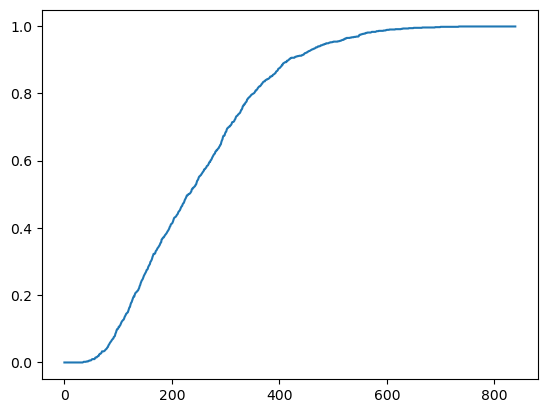

In [8]:
plt.plot(list(F.values()))
plt.show()

In [9]:
#теперь надо подсчитать 1-alpha квантиль (такое число F(1-alpha): P(x<F(1-alpha)) = (1-alpha))
alpha=0.05
quantile=list(F.keys())[list(F.values()).index(1-alpha)]
try:
    quantile_alpha=list(F.keys())[list(F.values()).index(alpha)]
except:
    
    id2=(torch.tensor(list(F.values()))>0.05).nonzero()[0]
    id1=(torch.tensor(list(F.values()))<0.05).nonzero()[torch.tensor(len((torch.tensor(list(F.values()))<0.05).nonzero())-1)]
    if (list(F.values())[id2] - 0.05) > (0.05 - list(F.values())[id1]):
        alpha = list(F.values())[id1] 
    else:
        alpha = list(F.values())[id2] 
    quantile_alpha=list(F.keys())[list(F.values()).index(alpha)]
print('доверительный интервал: ',quantile_alpha,'-',quantile )

доверительный интервал:  82 - 492


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  


### проверка гипотезы


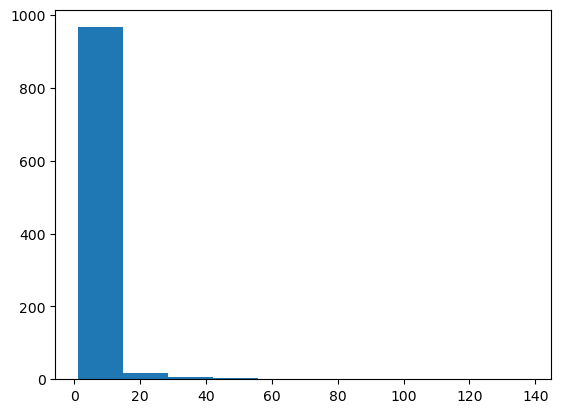

гипотеза НЕ отклоняется 152.52656007661622


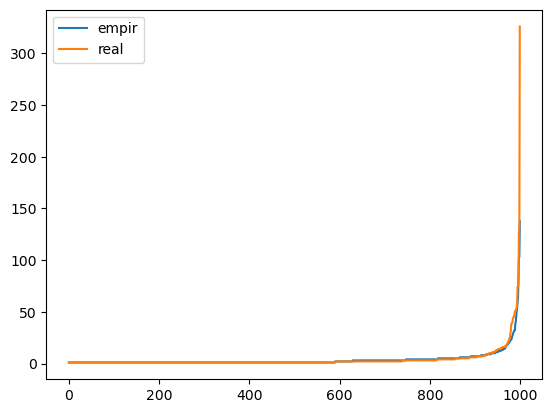

In [10]:
from MyModel import Main
N = 1000
d = 128 #размерность аттрибутов
sigma_init_list = list(np.arange(0.8,1.31,0.05)) 
sigma_every = 1
max_d = 500
L = 10
etta = 0.05
ro = 0.9
power = 2
min_d = 1
mu =  0.9

for sigma_init in sigma_init_list:
    #print('params',(mu, L, min_d,max_d,etta,ro,power))
    model = Main(N,max_d,L,etta,ro,mu,sigma_init,sigma_every,d,power=power,min_d=min_d)
    G,_ = model.making_graph()

degrees_MY = list(dict(G.degree()).values())
distribution = dist(degrees_MY)
plt.hist(degrees_MY)
plt.show()
if (func_statistics(distribution,real_dist) > quantile) or (func_statistics(distribution,real_dist) < quantile_alpha) :
    print('ГИПОТЕЗА ОТКЛОНЯЕТСЯ', func_statistics(distribution,real_dist))
else:
    print('гипотеза НЕ отклоняется',func_statistics(distribution,real_dist) )
    plt.plot(sorted(degrees_MY),label='empir')
    plt.plot(sorted(RandPL.rvs(size=N)),label='real')
    plt.legend()
    plt.show()
    

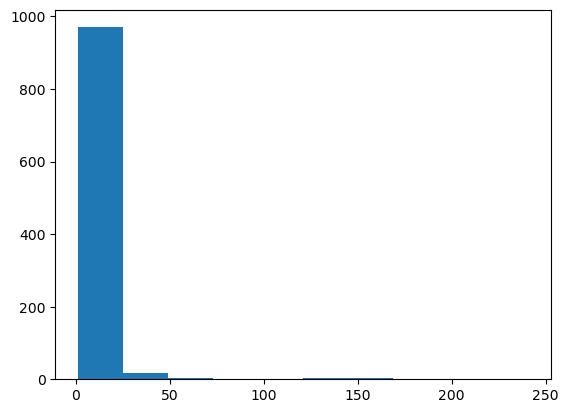

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 1493.394043522005
number connected components 1


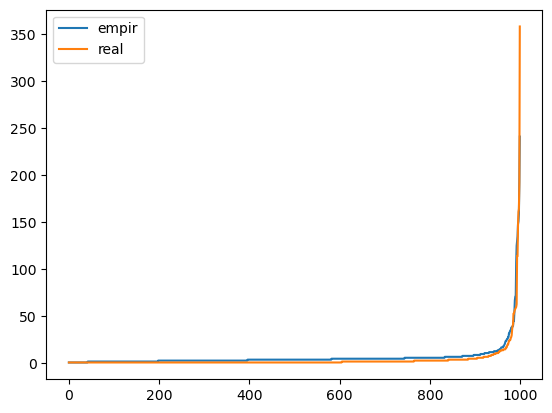

0:00:00.197153


In [20]:
#LFR
N=1000
tau1 = 2.0 #2-3
tau2 = 1.9 #1-2
mu = 0.5

min_degree = 1
max_degree =500

d= datetime.now()
timer = threading.Timer(3, lambda: _thread.interrupt_main())
timer.start()
try: 
    G = LFR(N, tau1, tau2, mu, min_degree=min_degree, max_degree=max_degree,min_community=50,max_iters=3000)
    degrees_LFR=list(dict(G.degree()).values())
    distribution = dist(degrees_LFR)
    plt.hist(degrees_LFR)
    plt.show()
    if (func_statistics(distribution,real_dist) > quantile) or (func_statistics(distribution,real_dist) < quantile_alpha) :
        print('ГИПОТЕЗА ОТКЛОНЯЕТСЯ', func_statistics(distribution,real_dist))
        print('number connected components',nx.number_connected_components(G))
        plt.plot(sorted(degrees_LFR),label='empir')
        plt.plot(sorted(RandPL.rvs(size=N)),label='real')
        plt.legend()
        plt.show()
    else:
        print('гипотеза НЕ отклоняется',func_statistics(distribution,real_dist) )
    
except KeyboardInterrupt:
    pass
    print('try again')
finally:
        # if the action ends in specified time, timer is canceled
    timer.cancel()
print(datetime.now()-d)

In [21]:
import pickle
with open('degrees.pickle','rb') as f:
    degs_SBM=pickle.load(f)

In [22]:
np.histogram(sorted(degrees_LFR))

(array([970,  17,   4,   0,   1,   3,   3,   0,   1,   1], dtype=int64),
 array([  1.,  25.,  49.,  73.,  97., 121., 145., 169., 193., 217., 241.]))

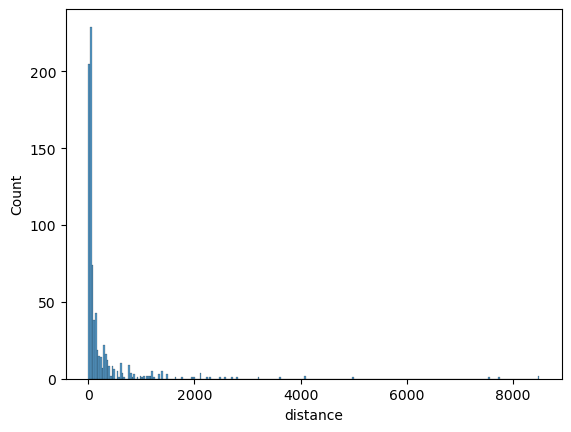

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [23]:
planets = sns.load_dataset("planets")
sns.histplot(data=planets, x="distance")
plt.show()
planets

In [24]:
df=pd.DataFrame(columns=['LFR','Our model','ADC-SBM','GenCAT','power degree'])
df['LFR']=pd.Series(sorted(degrees_LFR))
df['AB-BTER']=pd.Series(sorted(degrees_MY))
df['ADC-SBM']=pd.Series(sorted(degs_SBM[0]))
df['GenCAT']=pd.Series(sorted(degrees_GenCAT))
df['power law']=pd.Series(sorted(RandPL.rvs(size=N)))

In [56]:
font = {'family' : 'normal',
        
        'size'   : 20}
import matplotlib
matplotlib.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


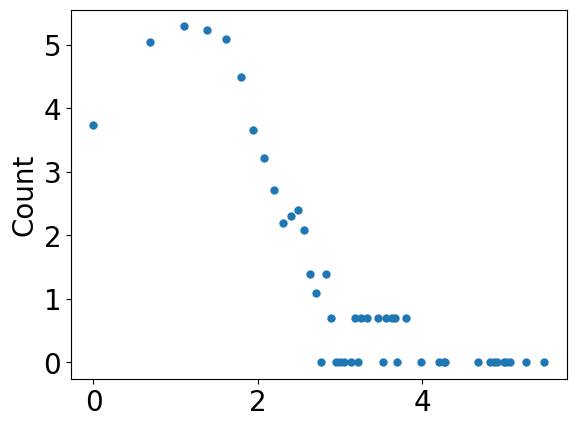

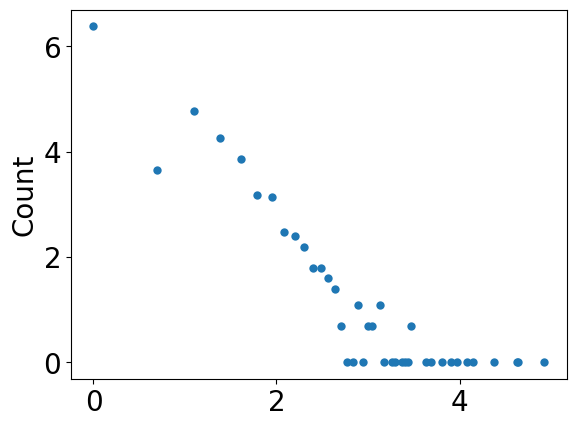

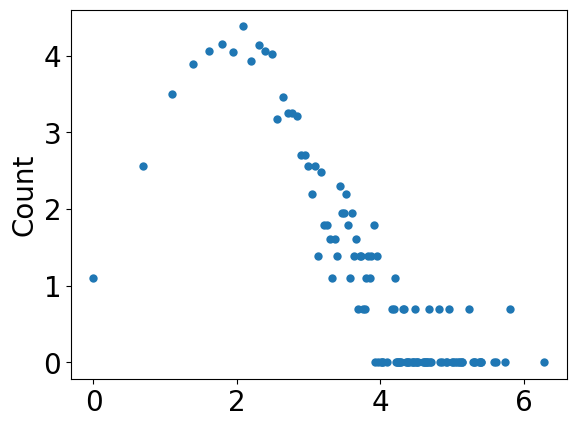

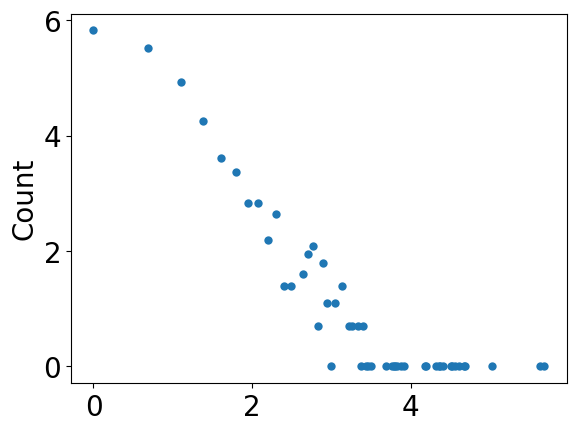

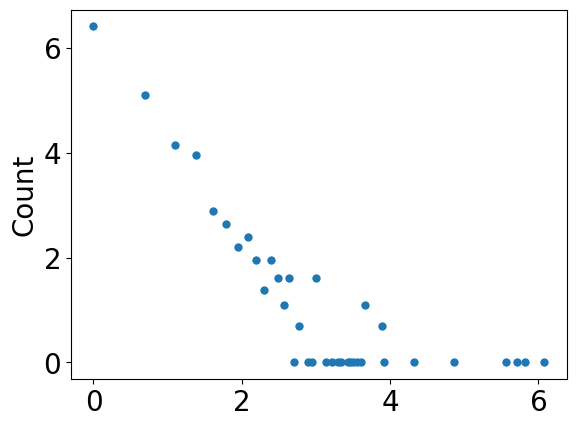

In [57]:
for name in ['LFR','AB-BTER','ADC-SBM','GenCAT','power law']:
    x= np.log(list(collections.Counter(df[name]).keys()))
    y = np.log(list(collections.Counter(df[name]).values()))
    plt.scatter(x,y, linewidths=0.001)
    plt.ylabel('Count')
    plt.show()

In [25]:
df=df.drop(columns=['Our model','power degree'])

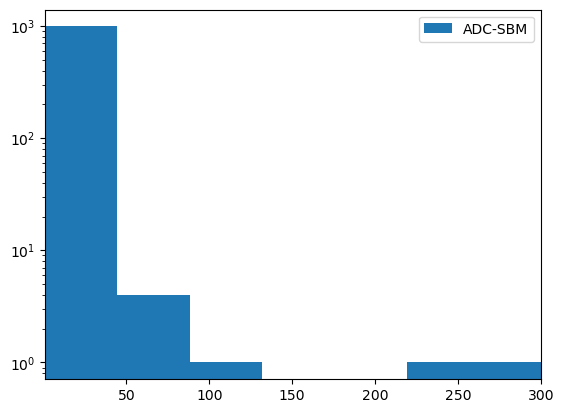

In [35]:
import seaborn as sns
#plt.hist(x = df['AB-BTER'],label='AC-BTER', log=True, )
plt.hist(x = df['power law'],label='ADC-SBM', log=True, )

plt.xlim((1,300))
plt.legend()
plt.show()

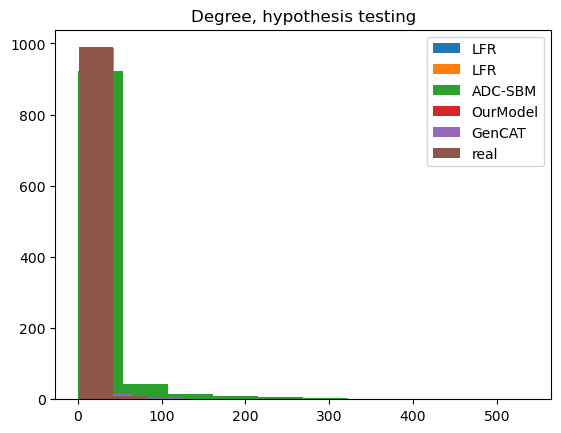

In [43]:
plt.hist(sorted(degrees_LFR),label='LFR')
plt.hist(sorted(degs_SBM[1]),label='ADC-SBM')
plt.hist(sorted(degrees_MY),label='OurModel')
plt.hist(sorted(degrees_GenCAT),label='GenCAT')
plt.hist(sorted(RandPL.rvs(size=N)),label='real')
plt.legend()
plt.title('Degree, hypothesis testing')
plt.show()


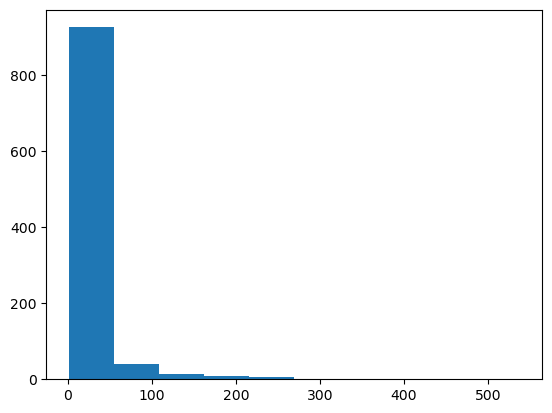

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4780.690381385867
number connected components 1


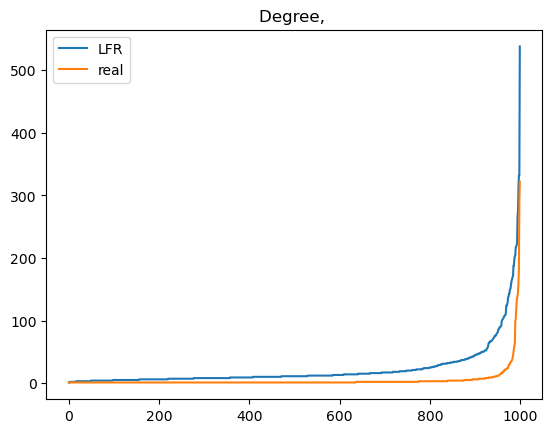

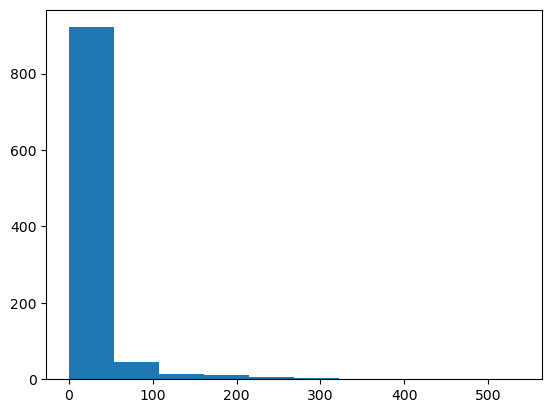

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4774.416617888933
number connected components 1


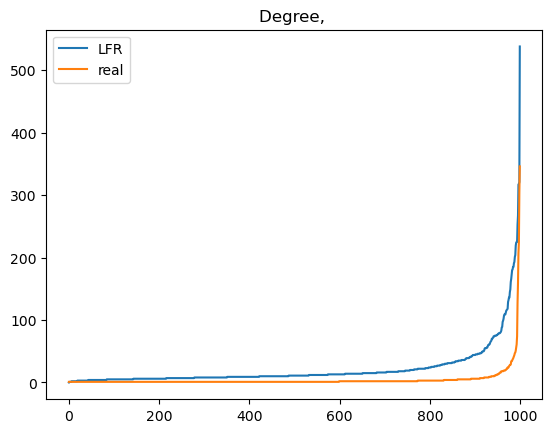

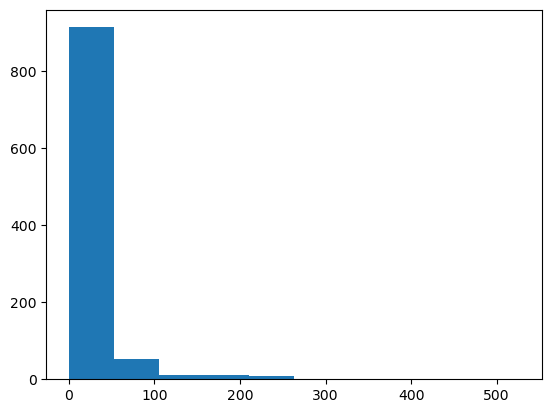

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4731.95425520428
number connected components 1


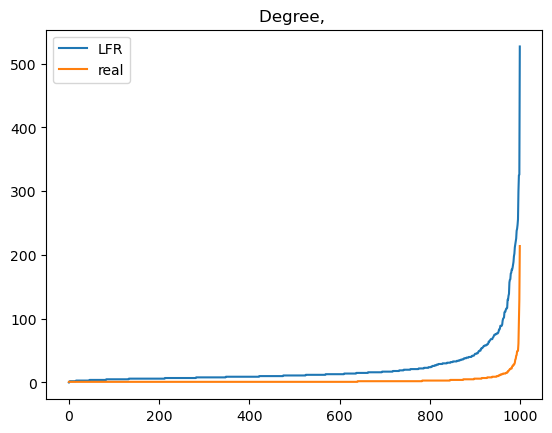

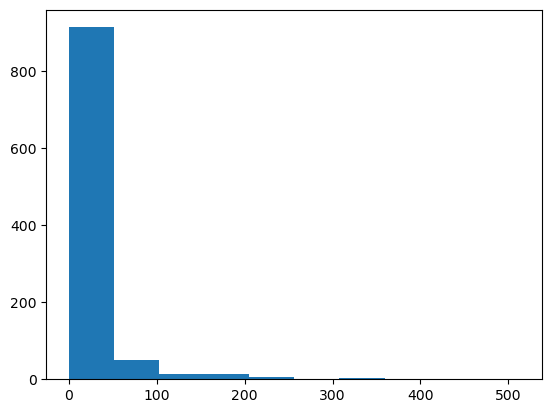

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4597.915999646963
number connected components 1


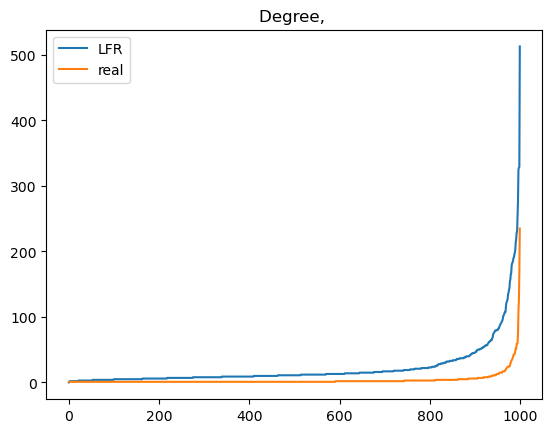

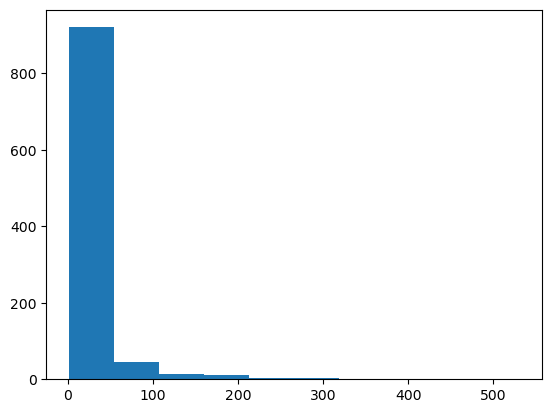

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4755.649192196463
number connected components 1


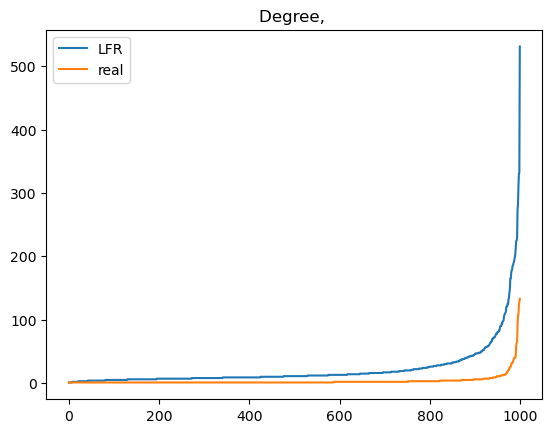

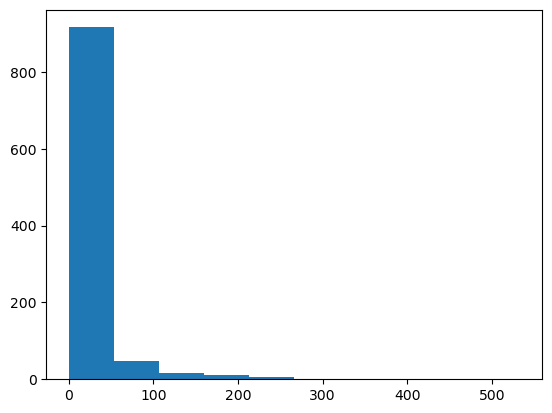

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4444.693233989077
number connected components 1


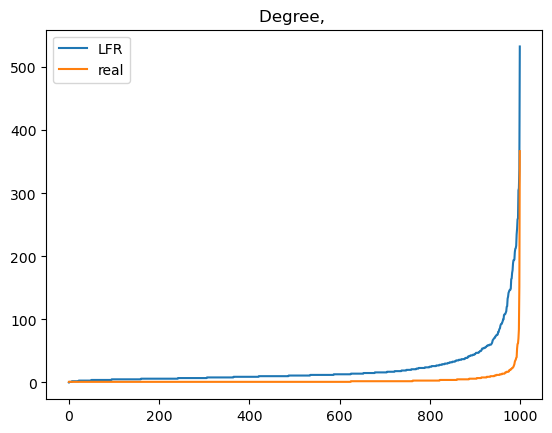

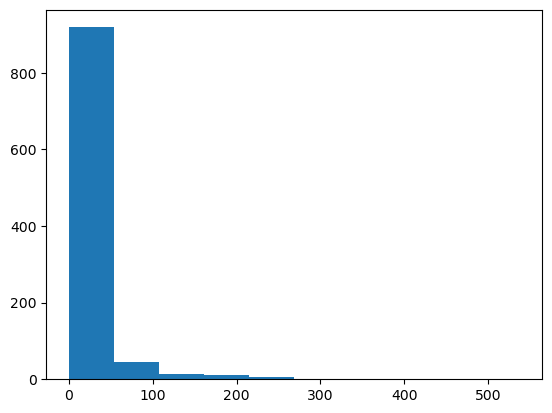

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4781.557042840098
number connected components 1


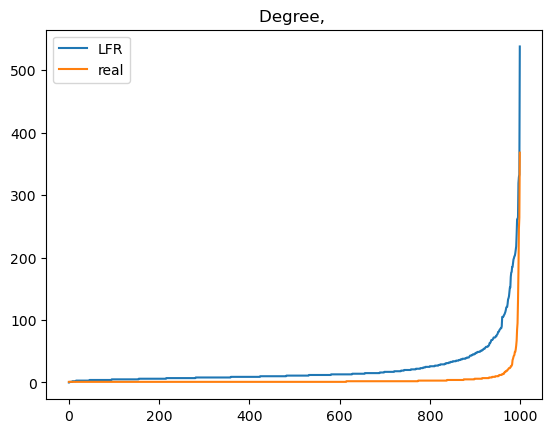

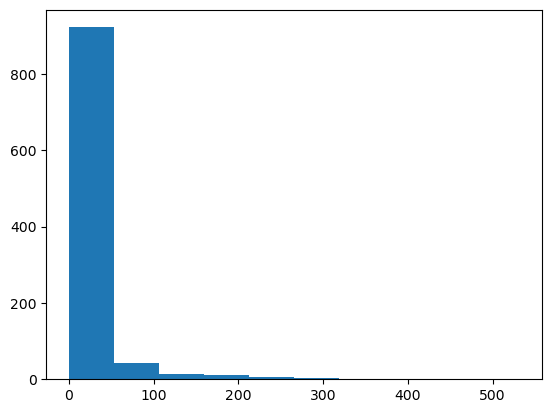

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4794.72953182462
number connected components 1


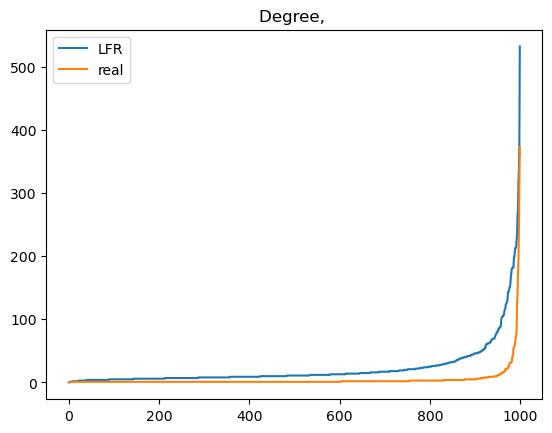

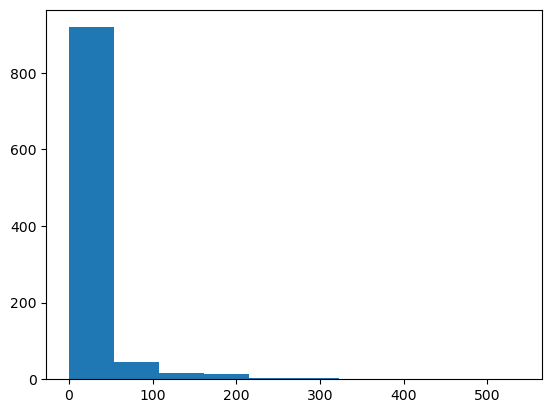

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4567.8189966809705
number connected components 1


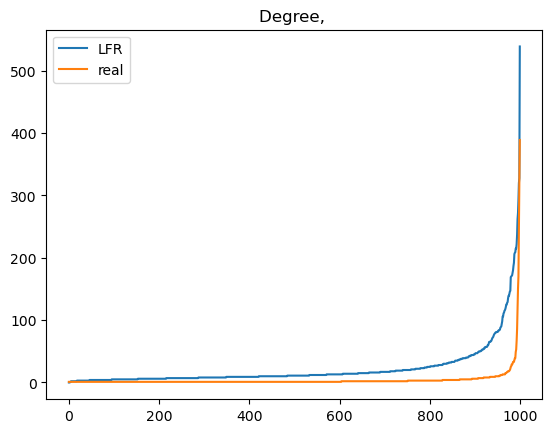

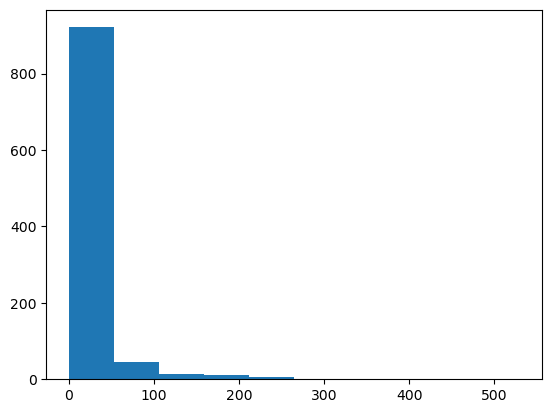

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4422.338172296392
number connected components 1


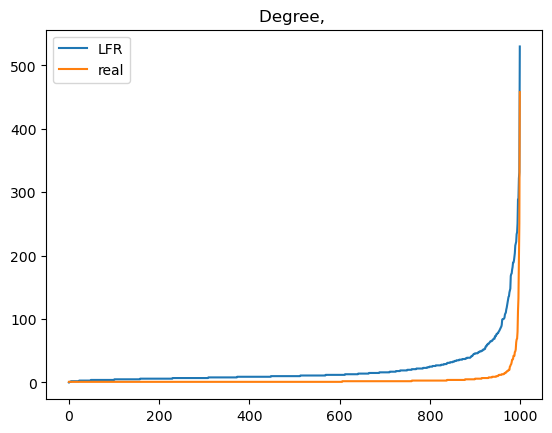

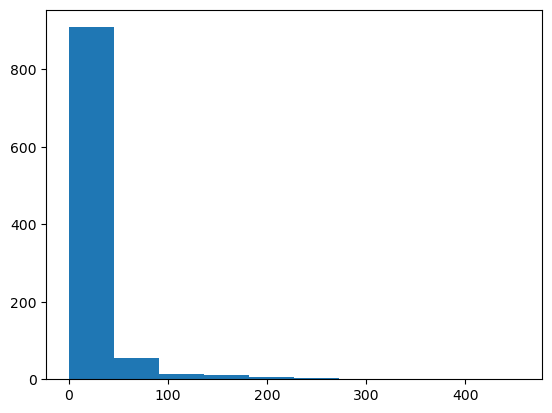

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4277.9138943678045
number connected components 1


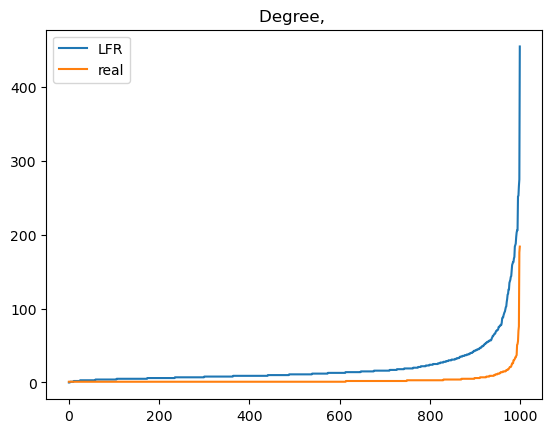

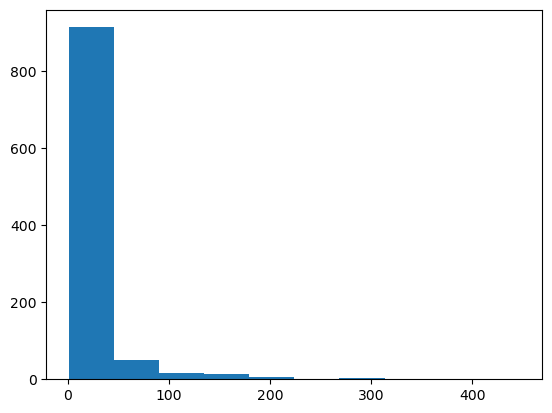

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4258.923786960821
number connected components 1


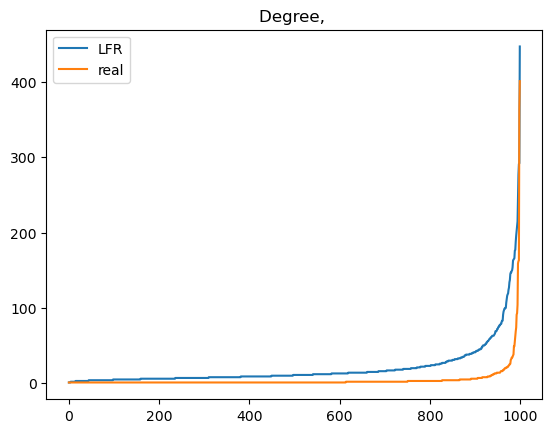

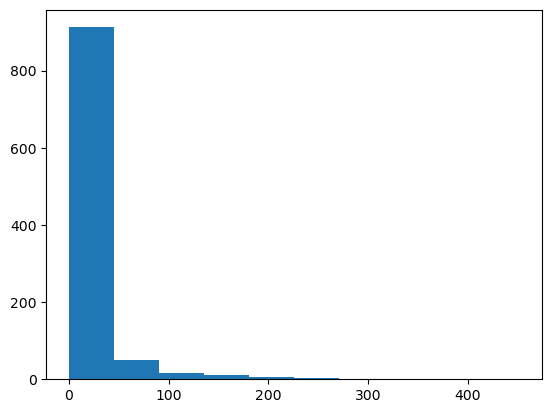

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4643.09584435402
number connected components 1


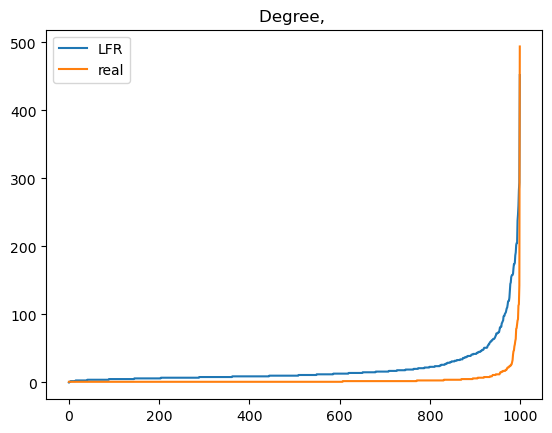

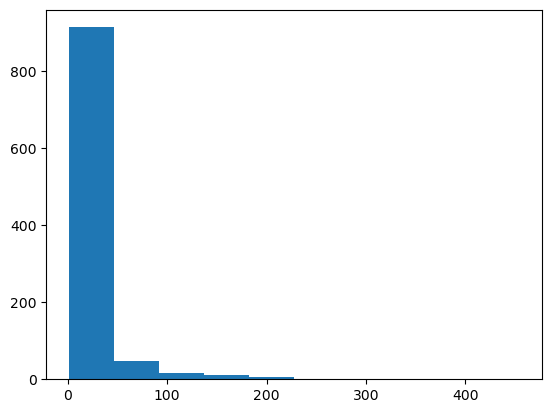

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4324.851521234231
number connected components 1


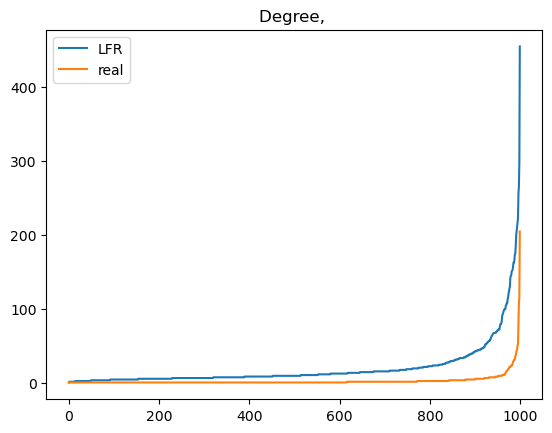

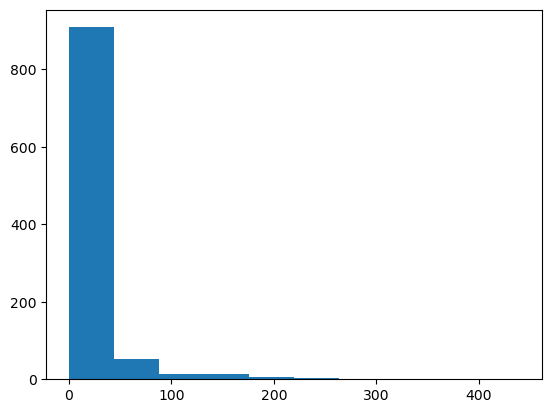

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4298.16933803749
number connected components 1


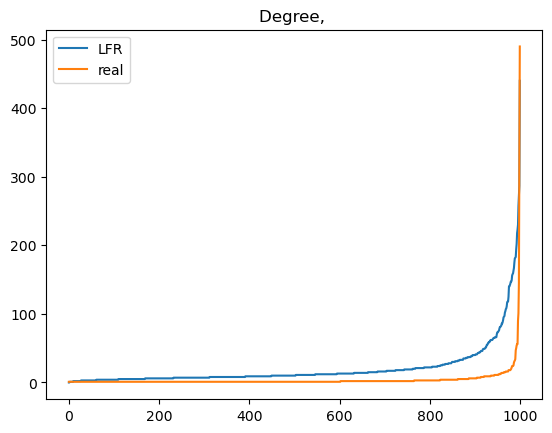

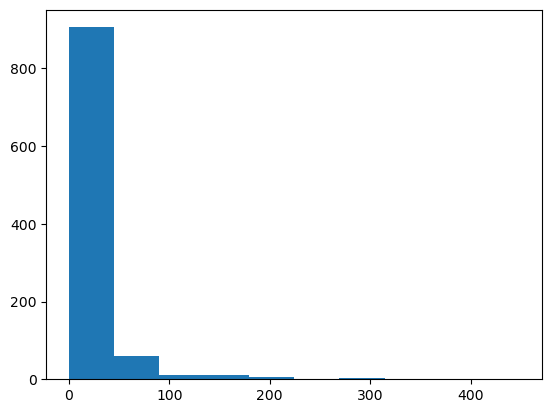

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4609.5742535557165
number connected components 1


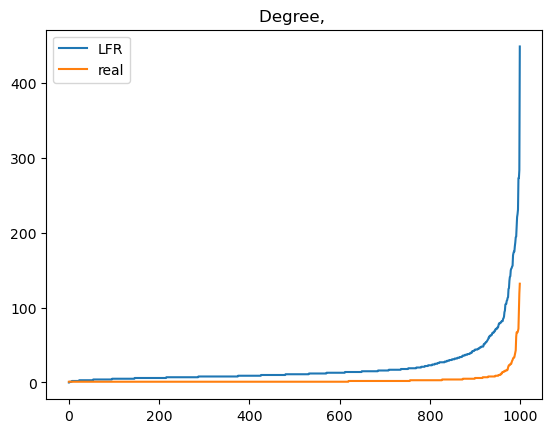

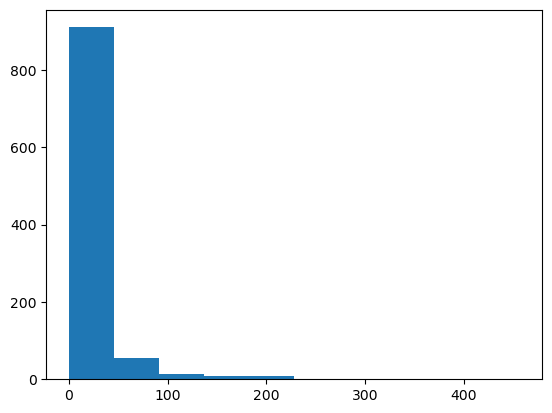

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4133.823835934536
number connected components 1


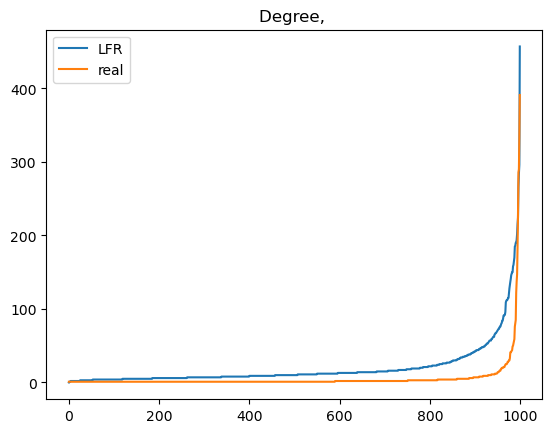

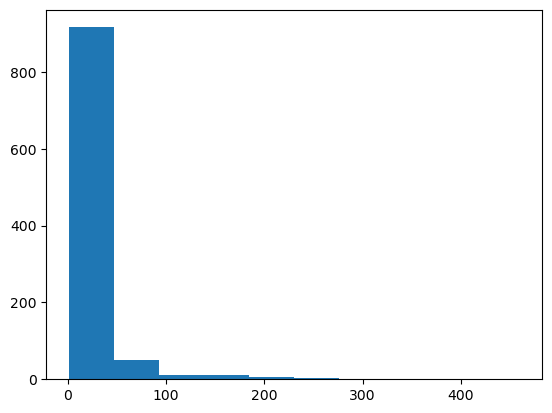

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4463.824487440757
number connected components 1


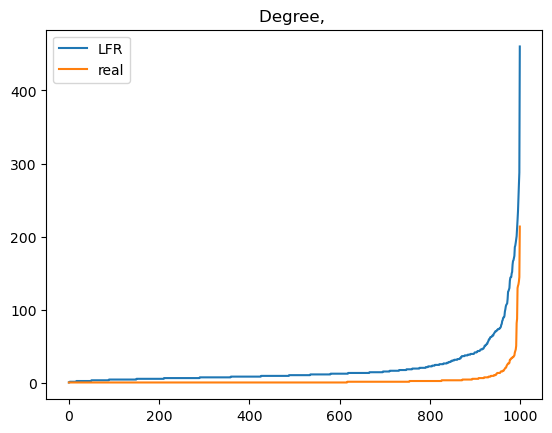

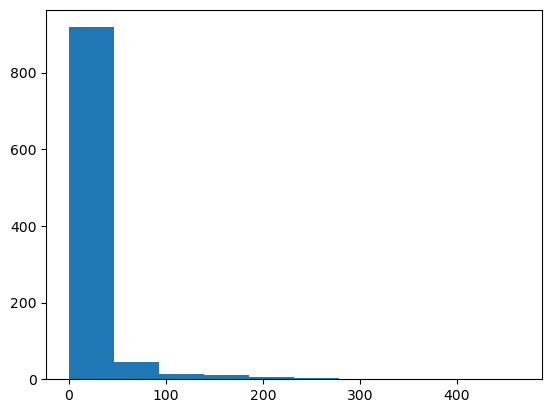

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4459.2663583462
number connected components 1


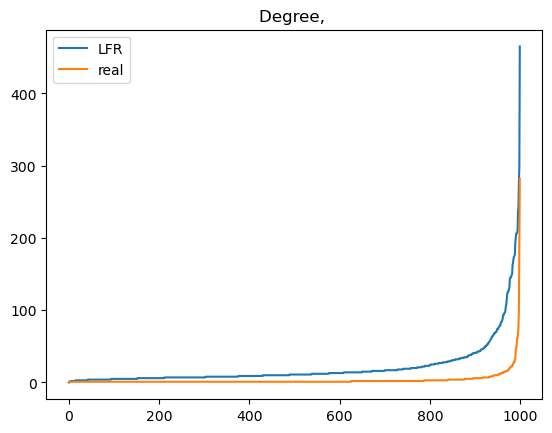

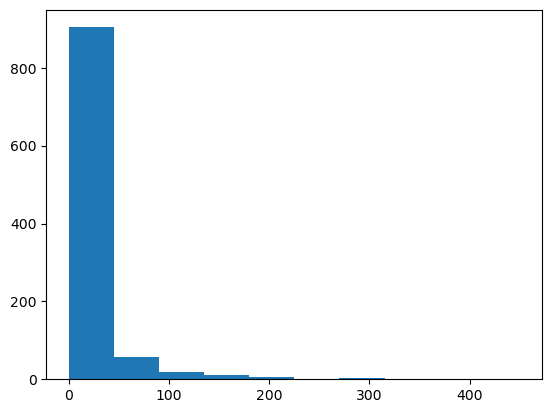

ГИПОТЕЗА ОТКЛОНЯЕТСЯ 4327.517605813636
number connected components 1


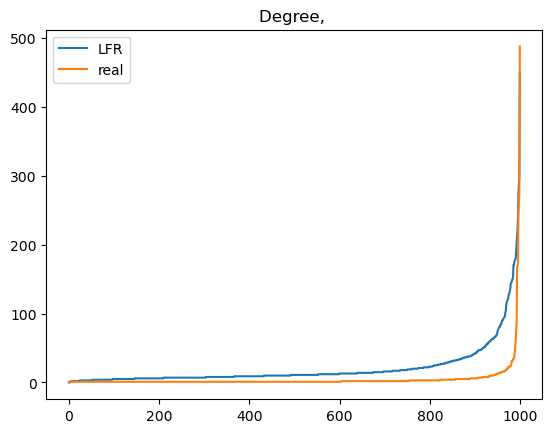

In [33]:
#SBM

degrees=d[0]
for degrees in d:
    distribution = dist(degrees)
    plt.hist(degrees)
    plt.show()
    if (func_statistics(distribution,real_dist) > quantile) or (func_statistics(distribution,real_dist) < quantile_alpha) :
            print('ГИПОТЕЗА ОТКЛОНЯЕТСЯ', func_statistics(distribution,real_dist))
            print('number connected components',nx.number_connected_components(G))
            plt.plot(sorted(degrees),label='LFR')
            plt.plot(sorted(RandPL.rvs(size=N)),label='real')
            plt.legend()
            plt.title('Degree, ')
            plt.show()
    else:
            print('гипотеза НЕ отклоняется',func_statistics(distribution,real_dist) )


In [14]:
import acMark as acmark
from scipy.stats import bernoulli
from torch_geometric.utils import from_scipy_sparse_matrix

In [16]:
def cos(a,b):
    return ((torch.matmul(a,b))/(torch.norm(a)*torch.norm(b)))

def to_networkx(data, N,node_attrs=None,remove_self_loops=False):
                import networkx as nx
                G = nx.Graph()
                for i,attr in enumerate(node_attrs):
                    G.add_node(i,attribute = attr)

                    
                for i, (u, v) in enumerate(edge_index.t().tolist()):
                    G.add_edge(u, v)
                return G

In [15]:
#GenCAT
z=10
n=1000
m=2**(z+5)
 
#print(n,m,max_deg)
k=10
d=128
mu=0.9
M = np.diag([mu]*k) + (np.ones((k,k))*((1-mu)/(k-1)) - np.diag([(1-mu)/(k-1)]*k) )
max_d= 500#min(int(n/2**(z-9.9)),n)

D = np.array([
    [0.2, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.2, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.25, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.25, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.3, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.3]
])

H = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
])
from datetime import datetime
date=datetime.now() 
disper = 0.5
p=0.5

ss=0
omega=0.2

if True:
                        H=np.zeros((d,k))
                        for delta in range(d):
                            lis=bernoulli.rvs(p=np.round(p,1), size=k)
                            for j,l in enumerate(lis):
                                if l == 1:
                                    H[delta][j] = np.random.rand()

                        M = np.diag([mu]*k) + (np.ones((k,k))*((1-mu)/(k-1)) - np.diag([(1-mu)/(k-1)]*k) )
                        D = np.random.rand(k,k)*disper
                        ss+=1
                        S,X,Label = acmark.acmark(n,m,k,d,max_d,M,D,H,omega=omega)   
                        edge_index = from_scipy_sparse_matrix(S)[0]

                        G = to_networkx(edge_index,n,torch.tensor(X))
                        degrees_GenCAT = list(dict(G.degree()).values())
                        print('here',G)
                            


expected number of edges :  33642.0
number of generated edges : 15789
here 


expected number of edges :  3029.5
number of generated edges : 2778


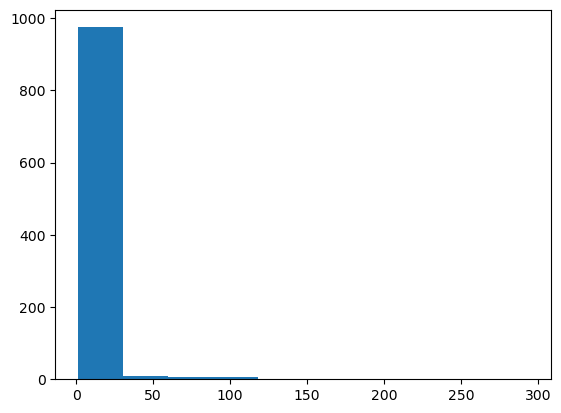

гипотеза НЕ отклоняется 412.98121454269193


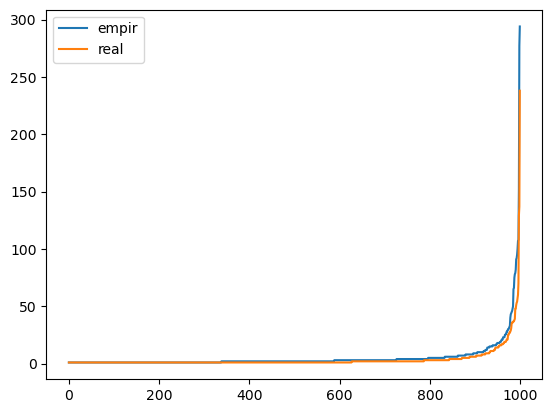

In [17]:
from MyModel import Main
N = 1000
d = 128 #размерность аттрибутов
sigma_init_list = list(np.arange(0.8,1.31,0.05)) 
sigma_every = 1
max_d = 500
L = 10
etta = 0.05
ro = 0.9
power = 2
min_d = 1
mu =  0.9
p=0.7
n=N
omega=0.2
disper = 0.1
for sigma_init in sigma_init_list:
    #print('params',(mu, L, min_d,max_d,etta,ro,power))
    model = Main(N,max_d,L,etta,ro,mu,sigma_init,sigma_every,d,power=power,min_d=min_d)
    G,_ = model.making_graph()
H=np.zeros((d,k))
for delta in range(d):
    lis=bernoulli.rvs(p=np.round(p,1), size=k)
    for j,l in enumerate(lis):
        if l == 1:
            H[delta][j] = np.random.rand()

M = np.diag([mu]*k) + (np.ones((k,k))*((1-mu)/(k-1)) - np.diag([(1-mu)/(k-1)]*k) )
D = np.random.rand(k,k)*disper


S,X,Label = acmark.acmark(n,m,k,d,max_d,M,D,H,omega=omega)   
edge_index = from_scipy_sparse_matrix(S)[0]

G = to_networkx(edge_index,n,torch.tensor(X))
degrees_GenCAT = list(dict(G.degree()).values())

distribution = dist(degrees_GenCAT)
plt.hist(degrees_GenCAT)
plt.show()
if (func_statistics(distribution,real_dist) > quantile) or (func_statistics(distribution,real_dist) < quantile_alpha) :
    print('ГИПОТЕЗА ОТКЛОНЯЕТСЯ', func_statistics(distribution,real_dist))
else:
    print('гипотеза НЕ отклоняется',func_statistics(distribution,real_dist) )
    plt.plot(sorted(degrees_GenCAT),label='empir')
    plt.plot(sorted(RandPL.rvs(size=N)),label='real')
    plt.legend()
    plt.show()
    